In [3]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 27 11:17:58 2025

@author: ksearle
"""
import re
import numpy as np
from collections import defaultdict


def parse_dat_file(file_path):
    parsed_data = defaultdict(dict)  # Dictionary to store variables and their indexed values
    current_variable = None
    buffer = ""  # Buffer to collect multiline values

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if not line or line.startswith("!"):  # Skip comments and empty lines
                continue

            if ":" in line:  # New variable starts
                if current_variable:  # Save the previous variable
                    store_buffer_data(current_variable, buffer, parsed_data)
                # Extract variable name and initialize buffer
                current_variable, value = map(str.strip, line.split(":", 1))
                current_variable = re.sub(r"\(.*?\)", "", current_variable).strip()  # Base variable name
                buffer = value  # Start collecting data for this variable
            else:
                buffer += " " + line  # Continue collecting data for the current variable

        # Save the last variable
        if current_variable:
            store_buffer_data(current_variable, buffer, parsed_data)

    # Convert defaultdict to regular dictionary for simplicity
    return {k: dict(v) if isinstance(v, dict) else v for k, v in parsed_data.items()}


def store_buffer_data(variable_name, buffer, parsed_data):
    """
    Parse the buffer content into indexed data and store it.
    """
    # Remove any stray '[' from the buffer before processing
    buffer = buffer.lstrip('[').rstrip(']')

    # Check if the value contains an array or just a scalar
    if "(" in buffer:  # Handle multi-dimensional array values
        pattern = re.compile(r"\((.*?)\)\s*([^()]+)")
        matches = pattern.findall(buffer)

        for index, value_str in matches:
            # Convert index into tuple for multi-dimensional keys
            index_tuple = tuple(map(int, index.split()))
            # Parse values (try converting to numbers)
            values = parse_values(value_str)
            parsed_data[variable_name][index_tuple] = values
    elif any(c in buffer for c in "0123456789"):  # Handle one-dimensional arrays (no parentheses but contains numbers)
        values = parse_values(buffer)
        parsed_data[variable_name] = values
    else:
        # It's a scalar value, store it directly
        parsed_data[variable_name] = parse_values(buffer)


def parse_values(value_str):
    """
    Parse a string of space-separated values into a list of numbers or strings.
    """
    # Strip any stray closing brackets (e.g., from the last value in the array)
    value_str = value_str.rstrip(']')

    try:
        # Try to parse as floats
        return [float(x) for x in value_str.split()]
    except ValueError:
        # Fallback to string array if parsing fails
        return value_str.split()


# Example usage
file_path = "CaseStudyData.txt"  # Replace with the actual file path
parsed_data = parse_dat_file(file_path)

In [4]:
# Print parsed variables and their indexed values
for variable, value_dict in parsed_data.items():
    print(f"{variable}:")

nbCustomers:
nbCandidates:
nbSuppliers:
nbProductGroups:
nbVehicleTypes:
nbPeriods:
nbScenarios:
CustomerId:
CustomerEasting:
CustomerNorthing:
CustomerPopulation:
CandidateId:
CandidateEasting:
CandidateNorthing:
SupplierId:
SupplierEasting:
SupplierNorthing:
SupplierProductGroup:
SupplierCapacity:
SupplierVehicleType:
VehicleCapacity:
VehicleCostPerMileOverall:
VehicleCostPerMileAndTonneOverall:
VehicleCO2PerMileAndTonne:
Setup:
Operating:
Capacity:
CustomerDemand:
CustomerDemandPeriods:
CustomerDemandPeriodScenarios:
DistanceCandidateSupplier:
DistanceCandidateCustomer:


In [5]:
(parsed_data['nbCandidates'], parsed_data['nbSuppliers'], parsed_data['nbCustomers'])

([440.0], [53.0], [440.0])

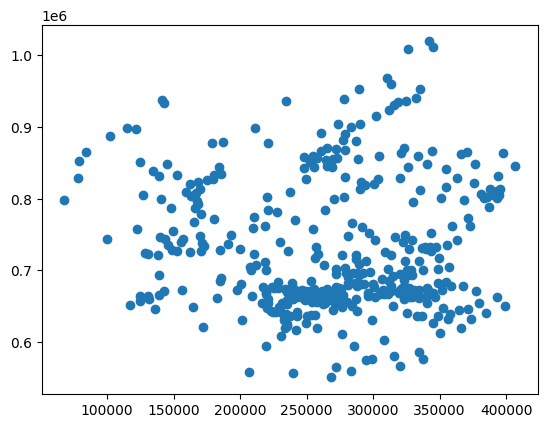

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(parsed_data['CustomerEasting'], parsed_data['CandidateNorthing'])
plt.show()

In [7]:
parsed_data['DistanceCandidateSupplier'].keys()

dict_keys([(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1

In [8]:
len(parsed_data['DistanceCandidateSupplier'][(2,1)])

53

In [21]:
parsed_data['CustomerEasting']

[392949.0,
 394404.0,
 393407.0,
 385705.0,
 383616.0,
 390049.0,
 390626.0,
 388067.0,
 392761.0,
 395127.0,
 393517.0,
 393198.0,
 371295.0,
 368583.0,
 381041.0,
 354926.0,
 351095.0,
 329911.0,
 335113.0,
 320029.0,
 326474.0,
 387134.0,
 394040.0,
 406781.0,
 397495.0,
 370725.0,
 365669.0,
 375804.0,
 363355.0,
 376242.0,
 354830.0,
 340831.0,
 344483.0,
 339910.0,
 336577.0,
 339111.0,
 342445.0,
 347205.0,
 343309.0,
 355772.0,
 343110.0,
 359638.0,
 372746.0,
 363292.0,
 299133.0,
 294522.0,
 285859.0,
 276612.0,
 283666.0,
 268127.0,
 271927.0,
 239503.0,
 206496.0,
 308481.0,
 315370.0,
 320042.0,
 334299.0,
 337497.0,
 325688.0,
 325167.0,
 324794.0,
 321358.0,
 323859.0,
 326720.0,
 327732.0,
 327185.0,
 326006.0,
 324424.0,
 321777.0,
 320396.0,
 322383.0,
 319785.0,
 330877.0,
 327885.0,
 328653.0,
 329698.0,
 330948.0,
 327698.0,
 334668.0,
 334020.0,
 334468.0,
 328965.0,
 326732.0,
 323384.0,
 311513.0,
 313433.0,
 312421.0,
 313025.0,
 348557.0,
 340707.0,
 340992.0,